In [1]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


\begin{eqnarray}
E_n = \bigg( \frac{h^2}{8m}\bigg) \frac{1}{\ell^2} n^2
\end{eqnarray}

\begin{eqnarray}
\psi(x) = \sqrt{\frac{2}{\ell}} \sin\bigg( \frac{n\pi x}{\ell} \bigg)
\end{eqnarray}

In [51]:
π          = pi
# Physical quantities
e          = 1.602e-19
h          = 4.135667               # eV fs
c          = 299792458              # [m/s]
massfactor = e/c/c                  # 1 eV/c^2 = 1.79e-36 kg
me         = 9.109e-31/massfactor   # [eV/c^2] = 0.5x10^6 eV/c^2   
c_nmfs     = 299.792458             # [nm/fs]
Eλ         = h*h*c_nmfs*c_nmfs/8/me # eV nm^2

# Number of levels to show
nmax       = 5
n          = arange(nmax)+1

ℓ          = 1                      # nm

E          = Eλ/ℓ/ℓ*n*n

x          = linspace(0,ℓ,1000)
ψ          = array( [ sqrt(2/ℓ)*sin(nv*π*x/ℓ) for nv in n] )
ψ2         = ψ*ψ

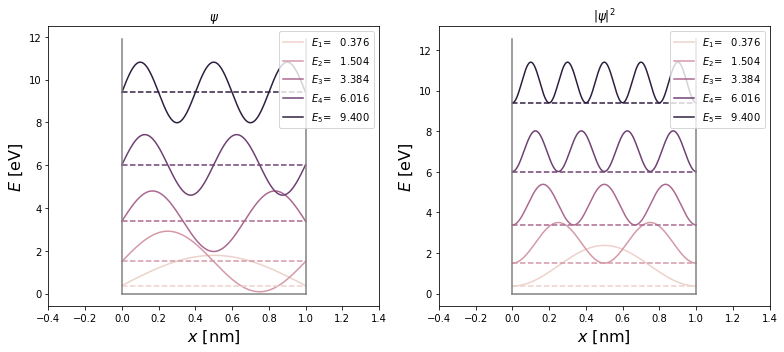

In [53]:
fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(11,5))

axes[0].set_xlim(-.4*ℓ  ,1.4*ℓ)

color_list = sns.cubehelix_palette(nmax)

for i in arange(nmax):
    axes[0].plot(x,E[i]+ψ[i],label=r"$E_{0}$={1:>8.3f}".format(i+1,E[i]),c=color_list[i])

for i in arange(nmax):
    axes[0].plot([0 ,ℓ],[E[i],E[i]],'--',c=color_list[i])

    

axes[0].plot([0,0],[0,(ψ.max()+E[-1])*1.1],c="Gray")
axes[0].plot([ℓ,ℓ],[0,(ψ.max()+E[-1])*1.1],c="Gray")
axes[0].plot([0,ℓ],[0,0],c="Gray")

axes[0].set_xlabel("$x$ [nm]",fontsize=16)
axes[0].set_ylabel("$E$ [eV]",fontsize=16)
axes[0].legend(loc=1)
axes[0].set_title(r"$\psi$")

axes[1].set_xlim(-.4*ℓ  ,1.4*ℓ)

color_list = sns.cubehelix_palette(nmax)

for i in arange(nmax):
    axes[1].plot(x,E[i]+ψ2[i],label=r"$E_{0}$={1:>8.3f}".format(i+1,E[i]),c=color_list[i])

for i in arange(nmax):
    axes[1].plot([0 ,ℓ],[E[i],E[i]],'--',c=color_list[i])

    

axes[1].plot([0,0],[0,(ψ2.max()+E[-1])*1.1],c="Gray")
axes[1].plot([ℓ,ℓ],[0,(ψ2.max()+E[-1])*1.1],c="Gray")
axes[1].plot([0,ℓ],[0,0],c="Gray")

axes[1].set_xlabel("$x$ [nm]",fontsize=16)
axes[1].set_ylabel("$E$ [eV]",fontsize=16)
axes[1].legend(loc=1)
axes[1].set_title(r"$|\psi|^2$")


fig.tight_layout()
fig.savefig("Cap2_OneDimensionalBox.pdf")